# OpenCV中的K-Means聚类

### 目标
- 了解如何在OpenCV中使用cv.kmeans()函数进行数据聚类

### 理解参数
#### 输入参数
1. **sample**：它应该是**np.float32**数据类型，并且每个功能都应该放在单个列中。
2. **nclusters(K)**：结束条件所需的簇数
3. **criteria**：这是迭代终止条件。满足此条件后，算法迭代将停止。实际上，它应该是3个参数的元组。它们是`(type,max_iter,epsilon)`：
    a. 终止条件的类型。它具有3个标志，如下所示：
    - **cv.TERM_CRITERIA_EPS**-如果达到指定的精度epsilon，则停止算法迭代。
    - **cv.TERM_CRITERIA_MAX_ITER**-在指定的迭代次数max_iter之后停止算法。
    - **cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER**-当满足上述任何条件时，停止迭代。
  
    b. max_iter-一个整数，指定最大迭代次数。
    c. epsilon-要求的精度
1. attempts：该标志用于指定使用不同的初始标签执行算法的次数。该算法返回产生最佳紧密度的标签。该紧凑性作为输出返回。
2. flags：此标志用于指定初始中心的获取方式。通常，为此使用两个标志：**cv.KMEANS_PP_CENTERS**和**cv.KMEANS_RANDOM_CENTERS**。

**输出参数**
1. 紧凑度：它是每个点到其相应中心的平方距离的总和。
2. 标签：这是标签数组（与上一篇文章中的“代码”相同），其中每个元素标记为“0”，“ 1” .....
3. 中心：这是群集中心的阵列。
现在，我们将通过三个示例了解如何应用K-Means算法。

### 1. 单特征数据
考虑一下，你有一组仅具有一个特征（即一维）的数据。例如，我们可以解决我们的T恤问题，你只用身高来决定T恤的尺寸。因此，我们首先创建数据并将其绘制在Matplotlib中 

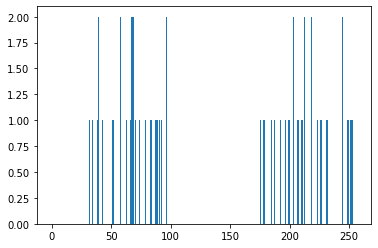

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)

z = np.hstack((x,y))

z = z.reshape((50,1))

z = np.float32(z)

plt.hist(z,256,[0,256])
plt.show()

因此，我们有了“ z”，它是一个大小为50的数组，值的范围是0到255。我将“z”重塑为列向量。
如果存在多个功能，它将更加有用。然后我制作了np.float32类型的数据。

现在我们应用KMeans函数。在此之前，我们需要指定标准。我的标准是，每当运行10次算法迭代或达到epsilon = 1.0的精度时，就停止算法并返回答案。

In [2]:
# 定义终止标准 = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# 设置标志
flags = cv.KMEANS_RANDOM_CENTERS

# 应用K均值
compactness,labels,centers = cv.kmeans(z,2,None,criteria,10,flags)

这为我们提供了紧凑性，标签和中心。在这种情况下，我得到的中心分别为60和207。标签的大小将与测试数据的大小相同，其中每个数据的质心都将标记为“ 0”，“ 1”，“ 2”等。现在，我们根据标签将数据分为不同的群集。

In [3]:
A = z[labels==0]
B = z[labels==1]

现在我们以红色绘制A，以蓝色绘制B，以黄色绘制其质心。

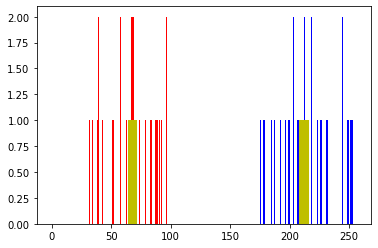

In [4]:
# 现在绘制用红色'A'，用蓝色绘制'B'，用黄色绘制中心
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')

plt.show()

### 2. 多特征数据
在前面的示例中，我们仅考虑了T恤问题的身高。在这里，我们将同时考虑身高和体重，即两个特征。
请记住，在以前的情况下，我们将数据制作为单个列向量。每个特征排列在一列中，而每一行对应于一个输入测试样本。
例如，在这种情况下，我们设置了一个大小为50x2的测试数据，即50人的身高和体重。第一列对应于全部50个人的身高，第二列对应于他们的体重。第一行包含两个元素，其中第一个是第一人称的身高，​​第二个是他的体重。类似地，剩余的行对应于其他人的身高和体重。查看下面的图片： 

![](data/oc_feature_representation.jpg)

现在，我直接转到代码：

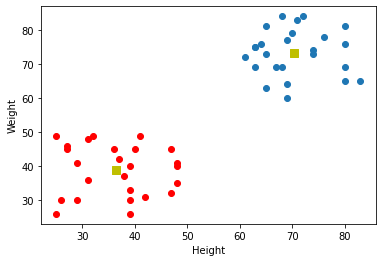

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))

Z = np.vstack((X,Y))

# 将数据转换未 np.float32
Z = np.float32(Z)

# 定义停止标准，应用K均值
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv.kmeans(Z,2,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# 现在分离数据, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# 绘制数据
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')

plt.show()

### 3.颜色量化
颜色量化是减少图像中颜色数量的过程。这样做的原因之一是减少内存。有时，某些设备可能会受到限制，因此只能产生有限数量的颜色。同样在那些情况下，执行颜色量化。在这里，我们使用k均值聚类进行颜色量化。

这里没有新内容要解释。有3个特征，例如R,G,B。因此，我们需要将图像重塑为Mx3大小的数组（M是图像中的像素数）。在聚类之后，我们将质心值（也是R,G,B）应用于所有像素，以使生成的图像具有指定数量的颜色。再一次，我们需要将其重塑为原始图像的形状。下面是代码： 

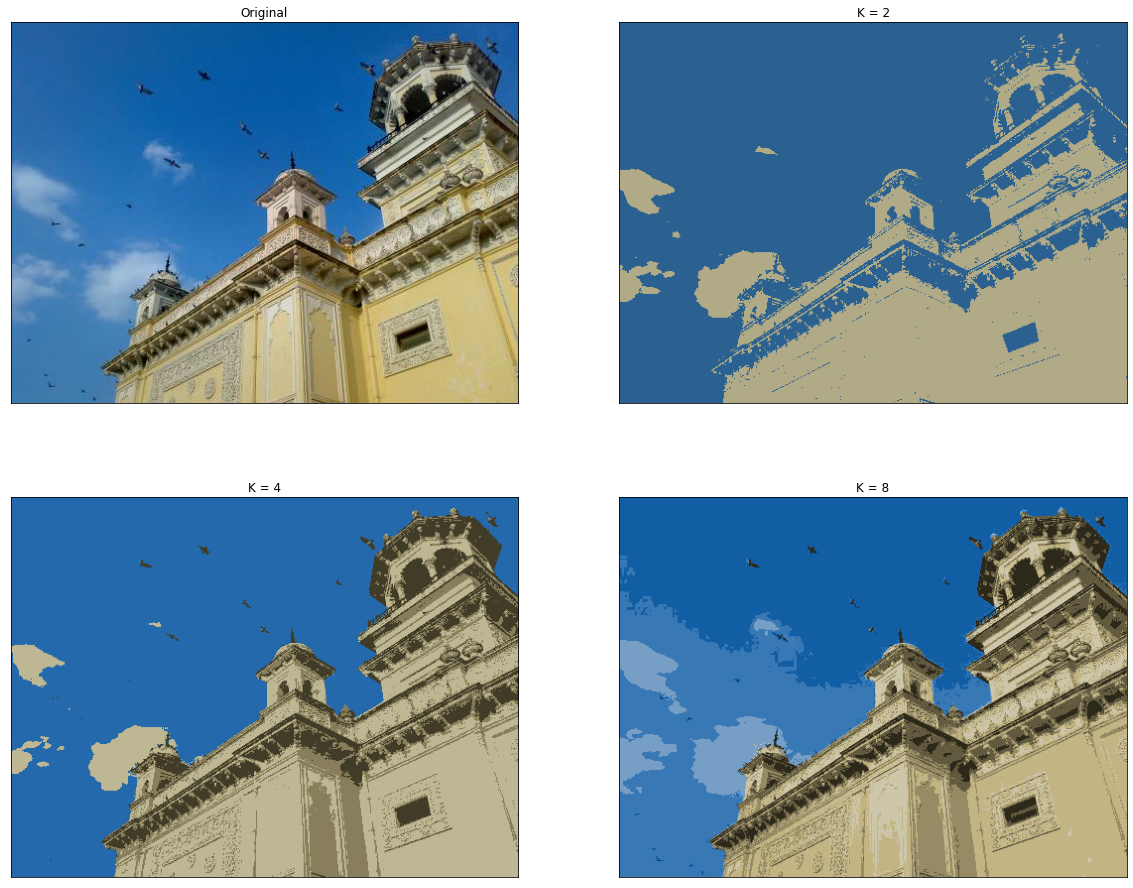

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/home.jpg')
Z = img.reshape((-1,3))

# 将数据转化为np.float32
Z = np.float32(Z)

# 定义终止标准 聚类数并应用k均值
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = [2, 4, 8]

plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([]), plt.yticks([])

for i in range(3):
  ret,label,center=cv.kmeans(Z,K[i],None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

  # 现在将数据转化为uint8, 并绘制原图像
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((img.shape))

  plt.subplot(2, 2, i+2)
  plt.imshow(cv.cvtColor(res2, cv.COLOR_BGR2RGB))
  plt.title('K = ' + str(K[i]))
  plt.xticks([]), plt.yticks([])

plt.show()

### 附加资源
### 练习